In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline
sns.set()

df_train = pd.read_csv('C:\\Users\\justin\\PycharmProjects\\Main_Test\\Machine-Learning\\Titanic Data\\train.csv')
df_test = pd.read_csv('C:\\Users\\justin\\PycharmProjects\\Main_Test\\Machine-Learning\\Titanic Data\\test.csv')

In [3]:
survived_train = df_train.Survived

data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]

In [4]:
data_train = data.iloc[:891]
data_test = data.iloc[891:]

X = data_train.values
test = data_test.values
y = survived_train.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, kernel_initializer='uniform', activation='relu', input_dim=5))
model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

history = model.fit(X_train, y_train, epochs=250, batch_size=891, verbose=0, validation_split=0.33)

score = model.evaluate(X_test, y_test, batch_size=891)

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

223/223 [==============================] - 0s 4us/step


Test score: 0.4212751090526581
Test accuracy: 0.8026905655860901


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


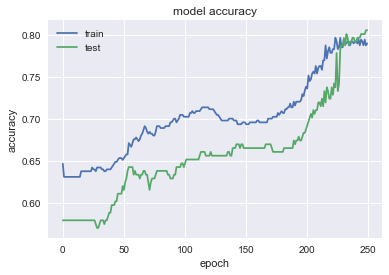

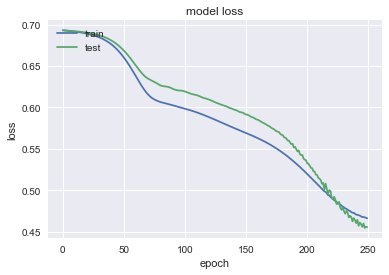

In [6]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
results = model.predict(test)

df_test['Survived'] = results

df_test[['PassengerId', 'Survived']].to_csv('C:\\Users\\justin\\PycharmProjects\\Main_Test\\Machine-Learning\\Titanic Data\\KerasModel.csv', index=False)

df_test[['PassengerId', 'Survived']].head()

,PassengerId,Survived
0,892,0.107503
1,893,0.274375
2,894,0.077752
3,895,0.128697
4,896,0.467176
